In [1]:
#Importing libraries
from math import exp, sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def iteration(h, f, x, y):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    r = y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return x + h, r

In [3]:
# Runge-Kutta process
def runge(t, h, x0, y0, f):
    a = []
    time = []
    a.append(y0)
    time.append(x0)
    x, y = x0, y0
    for i in range(int(t / h)):
        x, y = iteration(h, f, x, y)
        a.append(y)
        time.append(x)
    return time, a

In [4]:
# Runge-Kutta process plus F(t)
def runge_modif(t, h, x0, y0, f, N):
    Id = np.eye(2)
    Sx = np.array([[0, 1], [1, 0]]) / 2
    M = np.zeros((2 ** N, 2 ** N))
    for i in range(N):
        s = np.eye(1)
        for j in range(N):
            if (j == i):
                s = np.kron(s, Sx)
            else :
                s = np.kron(s, Id)
        M += s
    a = []
    time = []
    F = []
    F0 = np.dot(np.dot(y0.conj().T, M), y0)
    a.append(y0)
    time.append(x0)
    F.append(1)
    x, y = x0, y0
    for i in range(int(t / h)):
        x, y = iteration(h, f, x, y)
        F.append((np.dot(np.dot(y.conj().T, M), y)).item() / (F0).item())
        a.append(y)
        time.append(x)
    return time, a, F

In [5]:
# Random initialization
def rand_init(N):
    y = np.random.rand(2 ** N, 1)
    y = y / np.linalg.norm(y)
    ph = np.random.rand(2 ** N, 1) * 2 * pi
    ph = np.exp(1j * ph)
    return y * ph

In [6]:
print(rand_init(2))

[[-0.14922167-0.07028543j]
 [-0.11845815+0.104389j  ]
 [ 0.07343571+0.48018669j]
 [ 0.67140127-0.51099092j]]


In [7]:
#Termal initial spin evolution function
class term_ev:
    def __init__(self, const = 1):
        self.N = const
        
    def __call__(self, x, y):
        Id = np.eye(2)
        Sx = np.array([[0, 1], [1, 0]]) / 2
        H = np.zeros((2 ** self.N, 2 ** self.N))
        for i in range(self.N):
            s = np.eye(1)
            for j in range(self.N):
                if (j == i):
                    s = np.kron(s, Sx)
                else :
                    s = np.kron(s, Id)
            H += s
        return(-1 * np.dot(H, y))

In [8]:
#Evolution function
class ev:
    def __init__(self, const = np.array([])):
        self.H = const
        
    def __call__(self, x, y):
        return(-1j * np.dot(self.H, y))

In [9]:
#checking
funct = term_ev() 
funct.N = 2
x0 = 0
y0 = rand_init((2))
funct(x0, y0)

array([[-0.03157289-0.10768545j],
       [ 0.59818033+0.02945387j],
       [ 0.59818033+0.02945387j],
       [-0.03157289-0.10768545j]])

In [10]:
#initialization of initial state
def termal_initialization(N, T):
    x0 = 0
    y0 = rand_init(N)
    f = term_ev()
    f.N = N
    x, y = runge(1 / (2 * T), 1 / (2 * T * 1000), x0, y0, f)
    return y[-1]/np.linalg.norm(y[-1])

In [11]:
#checking
termal_initialization(2, 10)

array([[0.06874481-0.47792875j],
       [0.00077717+0.00985592j],
       [0.19171502+0.13416739j],
       [0.67933855-0.50050386j]])

In [12]:
#building of hamiltonian
def Hamilt(N, Jp, Jz):
    Id = np.eye(2)
    Sx = np.array([[0, 1], [1, 0]]) / 2
    Sy = np.array([[0, -1j], [1j, 0]]) / 2
    Sz = np.array([[1, 0], [0, -1]]) / 2
    H = np.zeros((2 ** N, 2 ** N))
    for i in range(N - 1):
        sx = np.eye(1)
        sy = np.eye(1)
        sz = np.eye(1)
        j = 0
        while j < N:
            if (j == i) :
                j += 1
                sx = np.kron(np.kron(sx, Sx), Sx)
                sy = np.kron(np.kron(sy, Sy), Sy)
                sz = np.kron(np.kron(sz, Sz), Sz)
            else:
                sx = np.kron(sx, Id)
                sy = np.kron(sy, Id)
                sz = np.kron(sz, Id)
            j += 1
        H = H + Jp * (sx + sy) + Jz * sz
    if N > 2 :
        sx = Sx
        sy = Sy
        sz = Sz
        for i in range(N - 2):
            sx = np.kron(sx, Id)
            sy = np.kron(sy, Id)
            sz = np.kron(sz, Id)
        sx = np.kron(sx, Sx)
        sy = np.kron(sy, Sy)
        sz = np.kron(sz, Sz)
        H = H + Jp * (sx + sy) + Jz * sz
    return(H)

In [13]:
#checking
Hamilt(2, -0.41, 0.82)

array([[ 0.205+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j, -0.205+0.j, -0.205+0.j,  0.   +0.j],
       [ 0.   +0.j, -0.205+0.j, -0.205+0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.205+0.j]])

In [14]:
#solution of the problem
def sol(N, Jp, Jz, T, h, t, M):
    H = Hamilt(N, Jp, Jz)
    x0 = 0
    F_av = np.zeros(int(t / h) + 1)
    f = ev()
    f.H = H
    for j in range(M):
        y0 = termal_initialization(N, T)
        x, y, F = runge_modif(t, h, x0, y0, f, N)
        F_av += np.real(np.array(F)) / M
    plt.plot(x, F_av)
    plt.show()

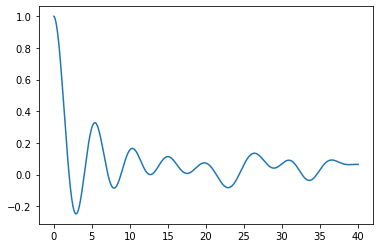

In [15]:
sol(9, -0.41, 0.82, 10, 0.01, 40, 100)

In [ ]:
sol(9, -0.41, 0.82, 10, 0.01, 40, 100)